In [1]:
from datasets import load_from_disk
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

/home/andrewlee/anaconda3/envs/andrew/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_dataset = load_from_disk("../data/train")
val_dataset = load_from_disk("../data/val")

/home/andrewlee/anaconda3/envs/andrew/lib/python3.8/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [3]:
def draw_yolo_bbox(image, bbox):
    """
    Draw YOLO bounding box on the image.
    
    :param image: The image (as a numpy array) on which to draw.
    :param bbox: The bounding box in YOLO format [center_x, center_y, width, height] (normalized).
    """
    image = np.array(image)
    img_height, img_width = image.shape[:2]

    # Denormalize the coordinates
    center_x, center_y, width, height = bbox
    center_x *= img_width
    center_y *= img_height
    width *= img_width
    height *= img_height

    # Convert to top-left corner format
    x_min = int(center_x - width / 2)
    y_min = int(center_y - height / 2)


    # Draw the bounding box
    cv2.rectangle(image, (x_min, y_min), (x_min + int(width), y_min + int(height)), (255, 0, 0), 2)

    # Display the image
    plt.imshow(image)
    plt.show()

Where is bed in the image? Return its bounding box in [center_x, center_y, width. height] format.
 (center_x, center_y) is the center of the bounding box, and (width, height) is the length of the bounding box.
 All values are normalized from 0 to 1 relative to width and height of the image. The top-left corner of the image is the reference point (0, 0).
bed
[0.2866, 0.7566216216216216, 0.5732, 0.45840840840840835]


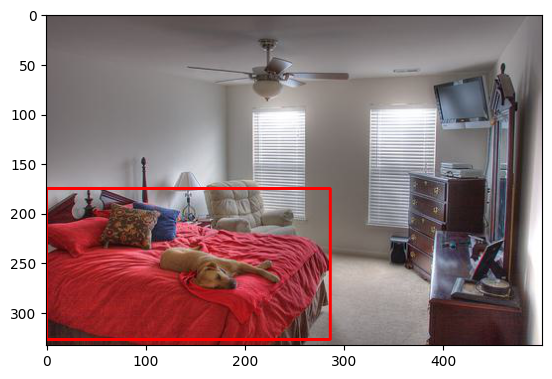

In [4]:
data = train_dataset[45345]

image = data['image']
bbox = data['bbox']
width = data['width']
height = data['height']

print(data['instruction'])
print(data['category_name'])
print(data['bbox'])
draw_yolo_bbox(image, bbox)